In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [7]:
df = pd.read_csv('Verizon.csv')

In [9]:
df.head()

,year,month,day,price,downpmt,monthdue,payment_left,monthly_payment,pmttype,credit_score,age,gender,default
0,2020,1,12,2178.85,250.00,6.0,1928.85,321.475000,4,1,0,2,0
1,2020,6,15,1543.65,1543.65,6.0,0.00,0.000000,1,0,0,2,0
2,2020,4,19,1107.67,125.00,5.0,982.67,196.534000,1,0,0,2,0
3,2020,3,17,950.44,237.61,9.0,712.83,79.203333,5,0,0,1,0
4,2020,8,21,1436.00,250.00,9.0,1186.00,131.777778,3,0,0,2,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24833 entries, 0 to 24832
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year             24833 non-null  int64  
 1   month            24833 non-null  int64  
 2   day              24833 non-null  int64  
 3   price            24833 non-null  float64
 4   downpmt          24833 non-null  float64
 5   monthdue         24833 non-null  float64
 6   payment_left     24833 non-null  float64
 7   monthly_payment  24833 non-null  float64
 8   pmttype          24833 non-null  int64  
 9   credit_score     24833 non-null  int64  
 10  age              24833 non-null  int64  
 11  gender           24833 non-null  int64  
 12  default          24833 non-null  int64  
dtypes: float64(5), int64(8)
memory usage: 2.5 MB


In [ ]:
df.describe()

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(df.isnull())

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(df['default'])
plt.xlabel('default')
plt.ylabel('Count')

In [ ]:
# Default by gender
plt.figure(figsize=(6,6))
df_default = df[df['default']==1]
sns.countplot(df_default['gender'])
plt.xlabel('gender')
plt.ylabel('Count')

In [ ]:
# Default by payment
plt.figure(figsize=(6,6))
df_default = df[df['default']==1]
sns.countplot(df_default['pmttype'])
plt.xlabel('payment type')
plt.ylabel('Count')

In [ ]:
# Default by age
plt.figure(figsize=(10,6))
sns.histplot(data = df, x = "age", kde = True, hue = "default")
plt.xlabel('age')
plt.ylabel('Count')

In [ ]:
# Default by down payment
plt.figure(figsize=(14,6))
sns.histplot(data = df, x = "downpmt", kde = True, hue = "default")
plt.xlabel('downpmt')
plt.ylabel('Count')

In [ ]:
# Default by credit score
plt.figure(figsize=(10,6))
sns.histplot(data = df, x = "credit_score", kde = True, hue = "default")
plt.xlabel('credit_score')
plt.ylabel('Count')

In [ ]:
# Default by price
plt.figure(figsize=(10,6))
sns.histplot(data = df, x = "price", kde = True, hue = "default")
plt.xlabel('price')
plt.ylabel('Count')
plt.show()

In [ ]:
fig = plt.figure(figsize = (15, 10));
ax = fig.gca();
df.hist(ax = ax, color = 'maroon')

In [ ]:
sns.set(font_scale = 1.2)
f, ax = plt.subplots(figsize = (10, 8))
ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize = 18)
ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize = 18)
sns.heatmap(df[['price', 'downpmt', 'monthdue', 'age']].corr(), annot = True, 
            linewidths = 0.5, fmt = '.1f', ax = ax, cmap = 'magma_r')

In [13]:
df.columns

Index(['year', 'month', 'day', 'price', 'downpmt', 'monthdue', 'payment_left',
       'monthly_payment', 'pmttype', 'credit_score', 'age', 'gender',
       'default'],
      dtype='object')

In [15]:
X = df.drop(columns=['default'])

In [17]:
y = df['default']

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [23]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=42)
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

In [25]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [27]:
print("\nConfusion Matrix for Logistic Regression Model:\n\n", confusion_matrix(y_test, y_pred_lr))
print("\nClassification Report for Logistic Regression Model:\n\n", classification_report(y_test, y_pred_lr))


Confusion Matrix for Logistic Regression Model:

 [[8464  308]
 [ 644  518]]

Classification Report for Logistic Regression Model:

               precision    recall  f1-score   support

           0       0.93      0.96      0.95      8772
           1       0.63      0.45      0.52      1162

    accuracy                           0.90      9934
   macro avg       0.78      0.71      0.73      9934
weighted avg       0.89      0.90      0.90      9934



In [29]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [31]:
print("\nConfusion Matrix for Random Forest Model:\n\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report for Random Forest Model:\n\n", classification_report(y_test, y_pred_rf))


Confusion Matrix for Random Forest Model:

 [[8493  279]
 [ 584  578]]

Classification Report for Random Forest Model:

               precision    recall  f1-score   support

           0       0.94      0.97      0.95      8772
           1       0.67      0.50      0.57      1162

    accuracy                           0.91      9934
   macro avg       0.81      0.73      0.76      9934
weighted avg       0.91      0.91      0.91      9934



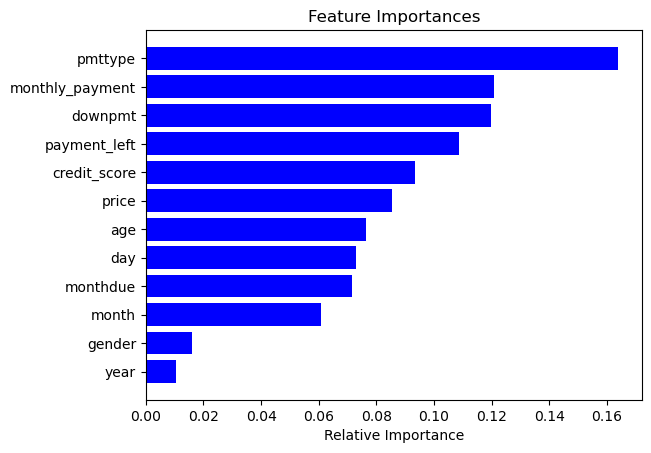

In [33]:
features = X.columns
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()